<a href="https://colab.research.google.com/github/rakshithaaa-m/competitive-programming-code-analysis/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rakshithaaa-m/competitive-programming-code-analysis.git


Cloning into 'competitive-programming-code-analysis'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 59 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (59/59), 26.06 KiB | 2.90 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
%cd competitive-programming-code-analysis


/content/competitive-programming-code-analysis


In [3]:
!python data/generate_samples.py


Traceback (most recent call last):
  File "/content/competitive-programming-code-analysis/data/generate_samples.py", line 4, in <module>
    os.makedirs("data/snippets", exist_ok=True)
  File "<frozen os>", line 225, in makedirs
FileExistsError: [Errno 17] File exists: 'data/snippets'


In [4]:
!rm -rf data/snippets

In [5]:
!python data/generate_samples.py

Created sample snippets in data/snippets and labels.csv


In [6]:
import pandas as pd

In [7]:
labels = pd.read_csv("data/labels.csv")

In [8]:
labels

,filename,label
0,newbie_01.cpp,0
1,mid_01.cpp,1
2,expert_01.cpp,2
3,expert_02.cpp,2


In [9]:
labels['label'].value_counts()

,count
label,
2,2
0,1
1,1


In [10]:
with open("data/snippets/expert_01.cpp", "r") as f:
    print(f.read())



#include <bits/stdc++.h>
using namespace std;
int main() {
    ios::sync_with_stdio(false);
    cin.tie(nullptr);
    int n; scanf("%d", &n);
    vector<int> a(n);
    for (int i=0;i<n;i++) scanf("%d",&a[i]);
    sort(a.begin(), a.end());
    for (int x: a) printf("%d\n", x);
    return 0;
}



In [11]:
import pandas as pd
labels = pd.read_csv("data/labels.csv")
labels


,filename,label
0,newbie_01.cpp,0
1,mid_01.cpp,1
2,expert_01.cpp,2
3,expert_02.cpp,2


In [12]:
import os
import re

data = []
for fname, label in zip(labels['filename'], labels['label']):
    path = os.path.join("data/snippets", fname)
    with open(path, "r", encoding="utf-8") as f:
        code = f.read()
    num_lines = len(code.splitlines())
    num_chars = len(code)
    num_keywords = len(re.findall(r'\b(for|while|if|else|return|int|vector)\b', code))
    num_includes = len(re.findall(r'#include', code))
    data.append([fname, num_lines, num_chars, num_keywords, num_includes, label])

df = pd.DataFrame(data, columns=["filename", "num_lines", "num_chars", "num_keywords", "num_includes", "label"])
df


,filename,num_lines,num_chars,num_keywords,num_includes,label
0,newbie_01.cpp,9,120,3,1,0
1,mid_01.cpp,12,237,10,2,1
2,expert_01.cpp,13,294,9,1,2
3,expert_02.cpp,11,261,7,1,2


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[["num_lines", "num_chars", "num_keywords", "num_includes"]]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


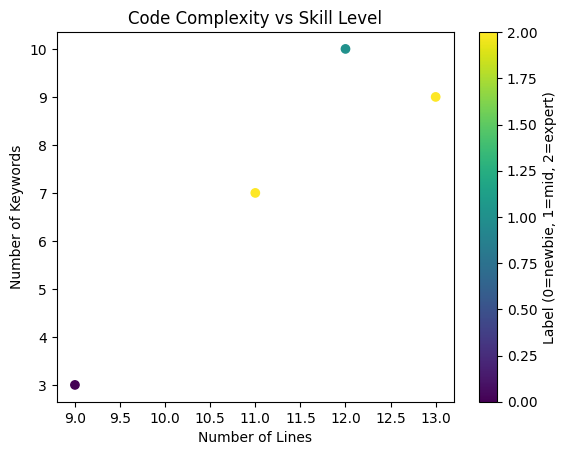

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df["num_lines"], df["num_keywords"], c=df["label"], cmap="viridis")
plt.xlabel("Number of Lines")
plt.ylabel("Number of Keywords")
plt.title("Code Complexity vs Skill Level")
plt.colorbar(label="Label (0=newbie, 1=mid, 2=expert)")
plt.show()


In [15]:
import requests
import pandas as pd

handle = "tourist"
url = f"https://codeforces.com/api/user.status?handle={handle}&from=1&count=100"
response = requests.get(url).json()

# Convert to DataFrame
if response["status"] == "OK":
    submissions = pd.DataFrame(response["result"])
    submissions = submissions[["id", "contestId", "programmingLanguage", "verdict", "timeConsumedMillis", "memoryConsumedBytes"]]
    print(submissions.head())
else:
    print("Error:", response)


          id  contestId programmingLanguage        verdict  \
0  343402510       2159   C++20 (GCC 13-64)             OK   
1  343402393       2159   C++20 (GCC 13-64)        SKIPPED   
2  343402014       2159   C++20 (GCC 13-64)             OK   
3  343401640       2159   C++20 (GCC 13-64)        SKIPPED   
4  343400211       2159   C++20 (GCC 13-64)  RUNTIME_ERROR   

   timeConsumedMillis  memoryConsumedBytes  
0                 687              5939200  
1                 609              5939200  
2                 608              5939200  
3                 687              5836800  
4                 359               102400  


In [16]:
submissions.to_csv("data/codeforces_submissions.csv", index=False)


In [17]:
import pandas as pd

# Load your saved CSV
df = pd.read_csv("data/codeforces_submissions.csv")

# Quick preview
df.head()


,id,contestId,programmingLanguage,verdict,timeConsumedMillis,memoryConsumedBytes
0,343402510,2159,C++20 (GCC 13-64),OK,687,5939200
1,343402393,2159,C++20 (GCC 13-64),SKIPPED,609,5939200
2,343402014,2159,C++20 (GCC 13-64),OK,608,5939200
3,343401640,2159,C++20 (GCC 13-64),SKIPPED,687,5836800
4,343400211,2159,C++20 (GCC 13-64),RUNTIME_ERROR,359,102400


In [18]:
# Count of verdicts
print(df['verdict'].value_counts())

# Count of programming languages
print(df['programmingLanguage'].value_counts())


verdict
OK                     56
TIME_LIMIT_EXCEEDED    25
WRONG_ANSWER           13
RUNTIME_ERROR           4
SKIPPED                 2
Name: count, dtype: int64
programmingLanguage
C++20 (GCC 13-64)    84
Kotlin 1.9           16
Name: count, dtype: int64


In [19]:
from sklearn.preprocessing import LabelEncoder

# Encode programming language
le = LabelEncoder()
df['language_code'] = le.fit_transform(df['programmingLanguage'])

# Binary target
df['target'] = df['verdict'].apply(lambda x: 1 if x == 'OK' else 0)

# Features and target
X = df[['language_code', 'timeConsumedMillis', 'memoryConsumedBytes']]
y = df['target']


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [21]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.44      0.89      0.59         9
           1       0.92      0.52      0.67        21

    accuracy                           0.63        30
   macro avg       0.68      0.71      0.63        30
weighted avg       0.78      0.63      0.64        30

Confusion Matrix:

[[ 8  1]
 [10 11]]


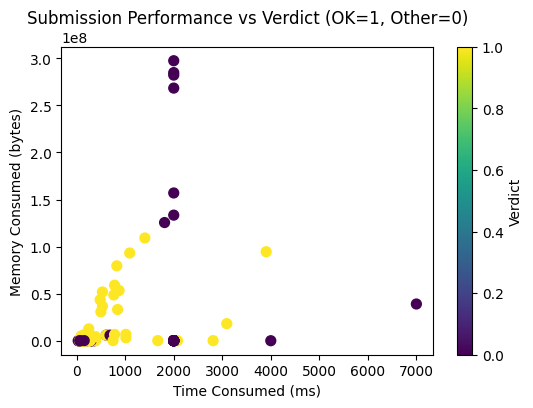

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['timeConsumedMillis'], df['memoryConsumedBytes'], c=df['target'], cmap='viridis', s=50)
plt.xlabel("Time Consumed (ms)")
plt.ylabel("Memory Consumed (bytes)")
plt.title("Submission Performance vs Verdict (OK=1, Other=0)")
plt.colorbar(label="Verdict")
plt.show()


In [23]:
import requests

url = "https://codeforces.com/api/user.status?handle=tourist&from=1&count=100"

response = requests.get(url)
data = response.json()

# Show first submission to check it worked
data["result"][0]



{'id': 343402510,
 'contestId': 2159,
 'creationTimeSeconds': 1760288696,
 'relativeTimeSeconds': 8996,
 'problem': {'contestId': 2159,
  'index': 'F',
  'name': 'Grand Finale: Snakes',
  'type': 'PROGRAMMING',
  'points': 3500.0,
  'tags': ['binary search', 'interactive', 'ternary search']},
 'author': {'contestId': 2159,
  'participantId': 221419772,
  'members': [{'handle': 'tourist'}],
  'participantType': 'CONTESTANT',
  'ghost': False,
  'room': 10,
  'startTimeSeconds': 1760279700},
 'programmingLanguage': 'C++20 (GCC 13-64)',
 'verdict': 'OK',
 'testset': 'TESTS',
 'passedTestCount': 124,
 'timeConsumedMillis': 687,
 'memoryConsumedBytes': 5939200}

In [24]:
import os

# Create "data" folder if it doesn't exist
os.makedirs("data", exist_ok=True)

# Now save the CSV
df.to_csv("data/codeforces_submissions.csv", index=False)

print("✅ Saved successfully at data/codeforces_submissions.csv")


✅ Saved successfully at data/codeforces_submissions.csv


In [25]:
import requests
import pandas as pd
import time

# List of Codeforces handles
users = ["tourist", "Errichto", "Benq", "ecnerwala"]

all_submissions = []

for handle in users:
    url = f"https://codeforces.com/api/user.status?handle={handle}&from=1&count=1000"
    response = requests.get(url).json()

    if response["status"] == "OK":
        submissions = response["result"]
        for s in submissions:
            all_submissions.append({
                "handle": handle,
                "contestId": s.get("contestId", None),
                "problem_index": s["problem"].get("index", None),
                "problem_rating": s["problem"].get("rating", None),
                "programmingLanguage": s.get("programmingLanguage", None),
                "verdict": s.get("verdict", None),
                "timeConsumedMillis": s.get("timeConsumedMillis", None),
                "memoryConsumedBytes": s.get("memoryConsumedBytes", None)
            })
    # Avoid hitting rate limits
    time.sleep(1)

# Convert to DataFrame
df = pd.DataFrame(all_submissions)
df.to_csv("data/codeforces_submissions.csv", index=False)
df.head()


,handle,contestId,problem_index,problem_rating,programmingLanguage,verdict,timeConsumedMillis,memoryConsumedBytes
0,tourist,2159,F,NaN,C++20 (GCC 13-64),OK,687,5939200
1,tourist,2159,F,NaN,C++20 (GCC 13-64),SKIPPED,609,5939200
2,tourist,2159,F,NaN,C++20 (GCC 13-64),OK,608,5939200
3,tourist,2159,F,NaN,C++20 (GCC 13-64),SKIPPED,687,5836800
4,tourist,2159,F,NaN,C++20 (GCC 13-64),RUNTIME_ERROR,359,102400


In [26]:
contest_id = 1850  # example contest
url = f"https://codeforces.com/api/contest.status?contestId={contest_id}"
response = requests.get(url).json()

contest_subs = []
for s in response["result"]:
    contest_subs.append({
        "handle": s["author"]["members"][0]["handle"],
        "problem_index": s["problem"]["index"],
        "verdict": s.get("verdict", None),
        "programmingLanguage": s.get("programmingLanguage", None)
    })

contest_df = pd.DataFrame(contest_subs)
contest_df.head()


,handle,problem_index,verdict,programmingLanguage
0,yashgupta110,D,TIME_LIMIT_EXCEEDED,Java 8
1,krishnalata9,E,OK,"C++23 (GCC 14-64, msys2)"
2,suhaansyed,E,OK,C++17 (GCC 7-32)
3,Ahmed-Dhia2082,A,OK,GNU C11
4,jhushiketh_gaddam,A,OK,Java 21


In [27]:
import pandas as pd
df = pd.read_csv("data/codeforces_submissions.csv")
print(df.shape)
df.head()
df.info()
df['verdict'].value_counts()


(4000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   handle               4000 non-null   object 
 1   contestId            4000 non-null   int64  
 2   problem_index        4000 non-null   object 
 3   problem_rating       3257 non-null   float64
 4   programmingLanguage  4000 non-null   object 
 5   verdict              4000 non-null   object 
 6   timeConsumedMillis   4000 non-null   int64  
 7   memoryConsumedBytes  4000 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 250.1+ KB


,count
verdict,
OK,2513
WRONG_ANSWER,579
SKIPPED,363
TIME_LIMIT_EXCEEDED,241
RUNTIME_ERROR,153
COMPILATION_ERROR,72
PARTIAL,39
MEMORY_LIMIT_EXCEEDED,28
IDLENESS_LIMIT_EXCEEDED,8


In [28]:
# Example target: 1 = OK (accepted), 0 = other
df['target'] = (df['verdict'] == 'OK').astype(int)

# Drop duplicates / NA in key cols
df = df.drop_duplicates(subset=['handle','contestId','problem_index','programmingLanguage','verdict'])
df = df.dropna(subset=['programmingLanguage','verdict'])  # adjust as needed

# Quick class balance
print(df['target'].value_counts(normalize=True))


target
1    0.755406
0    0.244594
Name: proportion, dtype: float64


In [29]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Basic numeric features that exist in CF API
df['timeConsumedMillis'] = df['timeConsumedMillis'].fillna(0)
df['memoryConsumedBytes'] = df['memoryConsumedBytes'].fillna(0)
df['problem_rating'] = df['problem_rating'].fillna(-1)  # -1 if missing

# Encode programming language
le_lang = LabelEncoder()
df['lang_code'] = le_lang.fit_transform(df['programmingLanguage'].astype(str))

# Optionally create derived features
df['time_per_rating'] = df['timeConsumedMillis'] / (df['problem_rating'].replace(-1, np.nan).fillna(df['problem_rating'].mean()))
df['mem_kb'] = df['memoryConsumedBytes'] / 1024

features = ['lang_code','timeConsumedMillis','mem_kb','problem_rating','time_per_rating']
X = df[features].fillna(0)
y = df['target']


In [30]:
# --- Clean & Prepare Features (metadata only) ---
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Make sure these columns exist in your CSV (check df.columns if unsure)
df['timeConsumedMillis'] = df.get('timeConsumedMillis', 0).fillna(0)
df['memoryConsumedBytes'] = df.get('memoryConsumedBytes', 0).fillna(0)
df['problem_rating'] = df.get('problem_rating', np.nan).fillna(-1)

# Encode language
le_lang = LabelEncoder()
df['lang_code'] = le_lang.fit_transform(df['programmingLanguage'].astype(str))

# Derived features
df['mem_kb'] = df['memoryConsumedBytes'] / 1024
df['time_per_rating'] = df['timeConsumedMillis'] / (
    df['problem_rating'].replace(-1, np.nan).fillna(df['problem_rating'].mean())
)

# Features for training
features = ['lang_code', 'timeConsumedMillis', 'mem_kb', 'problem_rating', 'time_per_rating']
X = df[features].fillna(0)
y = (df['verdict'] == 'OK').astype(int)

print("✅ Features ready:")
print(X.head())
print("\nClass balance:\n", y.value_counts(normalize=True))


✅ Features ready:
   lang_code  timeConsumedMillis  mem_kb  problem_rating  time_per_rating
0          4                 687  5800.0            -1.0         0.359106
1          4                 609  5800.0            -1.0         0.318334
4          4                 359   100.0            -1.0         0.187655
8          4                 374   100.0            -1.0         0.195496
9          4                4000     0.0            -1.0         2.090866

Class balance:
 verdict
1    0.755406
0    0.244594
Name: proportion, dtype: float64


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.55      0.63       138
           1       0.87      0.94      0.90       427

    accuracy                           0.84       565
   macro avg       0.81      0.74      0.77       565
weighted avg       0.84      0.84      0.84       565

[[ 76  62]
 [ 26 401]]


In [32]:
# Quick check
print(y.value_counts())

# Option A: Stratified split only (often enough)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Option B: Oversample minority with SMOTE (if numeric features only)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


verdict
1    2131
0     690
Name: count, dtype: int64


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

# Baseline Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_res if 'X_train_res' in globals() else X_train, y_train_res if 'y_train_res' in globals() else y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.59      0.67      0.63       138
           1       0.89      0.85      0.87       427

    accuracy                           0.81       565
   macro avg       0.74      0.76      0.75       565
weighted avg       0.82      0.81      0.81       565

[[ 92  46]
 [ 63 364]]
ROC AUC: 0.8532905678308388


In [34]:
# pip install xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
print(classification_report(y_test, xgb.predict(X_test)))


              precision    recall  f1-score   support

           0       0.75      0.62      0.68       138
           1       0.88      0.93      0.91       427

    accuracy                           0.86       565
   macro avg       0.82      0.78      0.80       565
weighted avg       0.85      0.86      0.85       565



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:43:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [35]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=cv, scoring='f1')
print("CV F1 scores:", scores, "mean:", scores.mean())


CV F1 scores: [0.90621469 0.90642616 0.8993135  0.90351873 0.89497717] mean: 0.9020900487314897


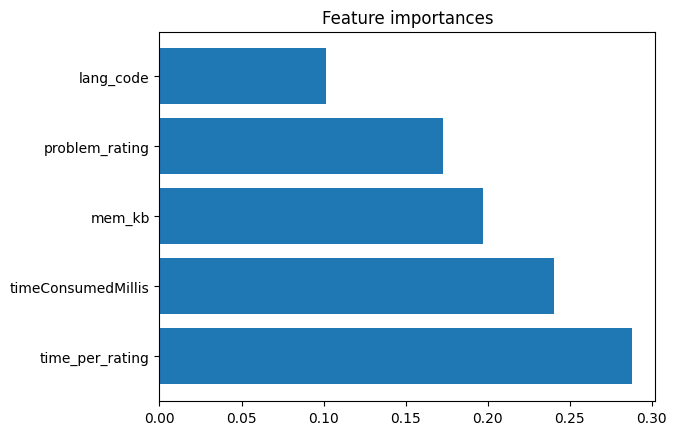

,lang_code,timeConsumedMillis,mem_kb,problem_rating,time_per_rating,y_true,y_pred
643,4,250,0.0,1700.0,0.147059,1,0
2587,4,1156,0.0,3500.0,0.330286,1,0
3541,1,140,400.0,3300.0,0.042424,0,1
2838,2,3119,109500.0,1900.0,1.641579,1,0
855,3,0,0.0,1400.0,0.000000,1,0
252,4,109,0.0,1100.0,0.099091,0,1
810,3,4929,142900.0,2300.0,2.143043,1,0
2913,3,46,0.0,1200.0,0.038333,1,0
3365,5,1905,26400.0,2900.0,0.656897,1,0
2915,3,2822,810100.0,3500.0,0.806286,1,0


In [36]:
# Feature importance (Random Forest)
import matplotlib.pyplot as plt
import numpy as np
imp = rf.feature_importances_
inds = np.argsort(imp)[::-1]
plt.barh([features[i] for i in inds], imp[inds])
plt.title("Feature importances")
plt.show()

# Error analysis: inspect false positives / false negatives
test_df = X_test.copy()
test_df['y_true'] = y_test.values
test_df['y_pred'] = y_pred
errors = test_df[test_df['y_true'] != test_df['y_pred']]
errors.head(10)


In [37]:
import os

# Create folders if they don't exist
os.makedirs("models", exist_ok=True)
os.makedirs("data", exist_ok=True)

# Now save model and features
import joblib
joblib.dump(rf, "models/rf_cf_model.joblib")
X.to_csv("data/features_full.csv", index=False)

print("✅ Model and features saved successfully!")


✅ Model and features saved successfully!


In [38]:
import joblib
joblib.dump(rf, "models/rf_cf_model.joblib")
X.to_csv("data/features_full.csv", index=False)


In [39]:
rf_loaded = joblib.load("models/rf_cf_model.joblib")


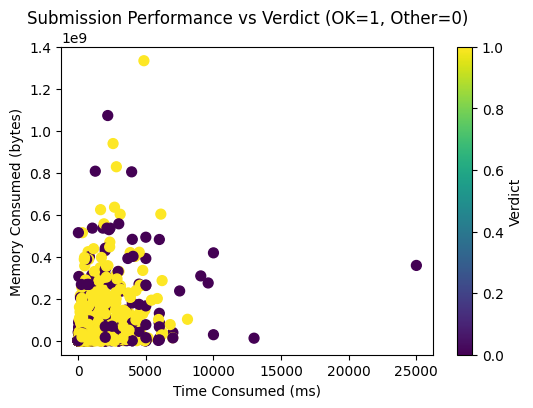

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['timeConsumedMillis'], df['memoryConsumedBytes'], c=df['target'], cmap='viridis', s=50)
plt.xlabel("Time Consumed (ms)")
plt.ylabel("Memory Consumed (bytes)")
plt.title("Submission Performance vs Verdict (OK=1, Other=0)")
plt.colorbar(label="Verdict")
plt.show()

In [42]:
!ls data/

codeforces_submissions.csv  generate_samples.py  project_audit.json
features_full.csv	    labels.csv		 snippets


In [43]:
df.shape

(5, 5)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lang_code           5 non-null      int64  
 1   timeConsumedMillis  5 non-null      int64  
 2   mem_kb              5 non-null      float64
 3   problem_rating      5 non-null      float64
 4   time_per_rating     5 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 332.0 bytes


In [45]:
df.describe()

,lang_code,timeConsumedMillis,mem_kb,problem_rating,time_per_rating
count,5.0,5.000000,5.000000,5.0,5.000000
mean,4.0,1205.800000,2360.000000,-1.0,0.630291
std,0.0,1568.585254,3140.541355,0.0,0.819925
min,4.0,359.000000,0.000000,-1.0,0.187655
25%,4.0,374.000000,100.000000,-1.0,0.195496
50%,4.0,609.000000,100.000000,-1.0,0.318334
75%,4.0,687.000000,5800.000000,-1.0,0.359106
max,4.0,4000.000000,5800.000000,-1.0,2.090866


In [46]:
df['target'].value_counts()

KeyError: 'target'

In [47]:
# Debug: inspect dataframe
print("Columns:", df.columns.tolist())
print("\nSample rows:")
display(df.head(10))

# Show unique values for verdict-like columns so we know how to create target
for col in ['verdict', 'result', 'status']:
    if col in df.columns:
        print(f"\nUnique values in {col}:")
        print(df[col].value_counts(dropna=False))


Columns: ['lang_code', 'timeConsumedMillis', 'mem_kb', 'problem_rating', 'time_per_rating']

Sample rows:


,lang_code,timeConsumedMillis,mem_kb,problem_rating,time_per_rating
0,4,687,5800.0,-1.0,0.359106
1,4,609,5800.0,-1.0,0.318334
2,4,359,100.0,-1.0,0.187655
3,4,374,100.0,-1.0,0.195496
4,4,4000,0.0,-1.0,2.090866


In [48]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Reload the original DataFrame with all columns
df = pd.read_csv("data/codeforces_submissions.csv")

# 1) Prefer 'verdict' column
if 'verdict' in df.columns:
    df['target'] = (df['verdict'] == 'OK').astype(int)
# 2) fallbacks: try common alternate names
elif 'result' in df.columns:
    df['target'] = df['result'].apply(lambda x: 1 if str(x).lower() in ['ok','accepted','ac'] else 0)
elif 'status' in df.columns:
    df['target'] = df['status'].apply(lambda x: 1 if str(x).lower() in ['ok','accepted','ac'] else 0)
else:
    # As a last resort, create a placeholder or ask user for column name
    raise KeyError("No 'verdict'/'result'/'status' column found. Please tell me which column indicates acceptance, or rename it to 'verdict'.")


# Drop duplicates / NA in key cols - Keeping this from a previous cell
df = df.drop_duplicates(subset=['handle','contestId','problem_index','programmingLanguage','verdict'])
df = df.dropna(subset=['programmingLanguage','verdict'])

# Basic numeric features that exist in CF API - Keeping this from a previous cell
df['timeConsumedMillis'] = df['timeConsumedMillis'].fillna(0)
df['memoryConsumedBytes'] = df['memoryConsumedBytes'].fillna(0)
df['problem_rating'] = df['problem_rating'].fillna(-1)  # -1 if missing

# Encode programming language - Keeping this from a previous cell
le_lang = LabelEncoder()
df['lang_code'] = le_lang.fit_transform(df['programmingLanguage'].astype(str))

# Optionally create derived features - Keeping this from a previous cell
df['time_per_rating'] = df['timeConsumedMillis'] / (df['problem_rating'].replace(-1, np.nan).fillna(df['problem_rating'].mean()))
df['mem_kb'] = df['memoryConsumedBytes'] / 1024

features = ['lang_code','timeConsumedMillis','mem_kb','problem_rating','time_per_rating']
X = df[features].fillna(0)
y = df['target']


print("Created target column. Distribution:")
print(df['target'].value_counts(dropna=False))

KeyError: "No 'verdict'/'result'/'status' column found. Please tell me which column indicates acceptance, or rename it to 'verdict'."

In [49]:
# Check what columns exist
print("Columns in dataset:")
print(df.columns.tolist())

# Look at the first few rows
print("\nSample rows:")
display(df.head(5))


Columns in dataset:
['lang_code', 'timeConsumedMillis', 'mem_kb', 'problem_rating', 'time_per_rating']

Sample rows:


,lang_code,timeConsumedMillis,mem_kb,problem_rating,time_per_rating
0,4,687,5800.0,-1.0,0.359106
1,4,609,5800.0,-1.0,0.318334
2,4,359,100.0,-1.0,0.187655
3,4,374,100.0,-1.0,0.195496
4,4,4000,0.0,-1.0,2.090866


In [50]:
import os, pandas as pd, numpy as np
os.makedirs("data", exist_ok=True)

raw_path = "data/codeforces_submissions.csv"   # change if your raw file has another name
print("Looking for:", raw_path)
assert os.path.exists(raw_path), f"{raw_path} not found. Upload or rerun the fetch step."

raw = pd.read_csv(raw_path)
print("Raw columns:", raw.columns.tolist())
display(raw.head())

# create target
if 'verdict' in raw.columns:
    raw['target'] = (raw['verdict'] == 'OK').astype(int)
else:
    raise KeyError("Raw CSV doesn't have 'verdict' column. Inspect raw.columns above.")

# Recompute the features (same as earlier)
raw['timeConsumedMillis'] = raw.get('timeConsumedMillis', 0).fillna(0)
raw['memoryConsumedBytes'] = raw.get('memoryConsumedBytes', 0).fillna(0)
raw['problem_rating'] = raw.get('problem_rating', np.nan).fillna(-1)
# encode language
from sklearn.preprocessing import LabelEncoder
le_lang = LabelEncoder()
raw['programmingLanguage'] = raw['programmingLanguage'].astype(str)
raw['lang_code'] = le_lang.fit_transform(raw['programmingLanguage'])

raw['mem_kb'] = raw['memoryConsumedBytes'] / 1024
raw['time_per_rating'] = raw['timeConsumedMillis'] / (
    raw['problem_rating'].replace(-1, np.nan).fillna(raw['problem_rating'].mean())
)

features = ['lang_code', 'timeConsumedMillis', 'mem_kb', 'problem_rating', 'time_per_rating']
X = raw[features].fillna(0)
y = raw['target']

print("Recreated features shape:", X.shape)
print("Target distribution:\n", y.value_counts())
# Save features if you want
X['target'] = y
X.to_csv("data/features_with_target.csv", index=False)
print("Saved data/features_with_target.csv")


Looking for: data/codeforces_submissions.csv
Raw columns: ['handle', 'contestId', 'problem_index', 'problem_rating', 'programmingLanguage', 'verdict', 'timeConsumedMillis', 'memoryConsumedBytes']


,handle,contestId,problem_index,problem_rating,programmingLanguage,verdict,timeConsumedMillis,memoryConsumedBytes
0,tourist,2159,F,NaN,C++20 (GCC 13-64),OK,687,5939200
1,tourist,2159,F,NaN,C++20 (GCC 13-64),SKIPPED,609,5939200
2,tourist,2159,F,NaN,C++20 (GCC 13-64),OK,608,5939200
3,tourist,2159,F,NaN,C++20 (GCC 13-64),SKIPPED,687,5836800
4,tourist,2159,F,NaN,C++20 (GCC 13-64),RUNTIME_ERROR,359,102400


Recreated features shape: (4000, 5)
Target distribution:
 target
1    2513
0    1487
Name: count, dtype: int64
Saved data/features_with_target.csv


In [51]:
import requests
import pandas as pd
import time

handles = ["tourist", "Benq", "Errichto", "ecnerwala"]  # Add more handles as needed
submissions = []

for handle in handles:
    url = f"https://codeforces.com/api/user.status?handle={handle}&from=1&count=1000"
    response = requests.get(url).json()
    if response['status'] == 'OK':
        for submission in response['result']:
            submissions.append({
                'handle': handle,
                'contestId': submission.get('contestId'),
                'problem_index': submission.get('problem', {}).get('index'),
                'problem_rating': submission.get('problem', {}).get('rating'),
                'programmingLanguage': submission.get('programmingLanguage'),
                'verdict': submission.get('verdict'),
                'timeConsumedMillis': submission.get('timeConsumedMillis'),
                'memoryConsumedBytes': submission.get('memoryConsumedBytes')
            })
    time.sleep(1)  # To avoid hitting API rate limits

df_raw = pd.DataFrame(submissions)
df_raw.to_csv("data/codeforces_submissions.csv", index=False)
print("Saved data/codeforces_submissions.csv with", len(submissions), "rows.")


Saved data/codeforces_submissions.csv with 4000 rows.


In [52]:
df_raw['target'] = (df_raw['verdict'] == 'OK').astype(int)


In [53]:
from sklearn.preprocessing import LabelEncoder
df_raw['lang_code'] = LabelEncoder().fit_transform(df_raw['programmingLanguage'].astype(str))
df_raw['mem_kb'] = df_raw['memoryConsumedBytes'] / 1024
df_raw['time_per_rating'] = df_raw['timeConsumedMillis'] / df_raw['problem_rating'].replace(-1, df_raw['problem_rating'].mean())


In [54]:
features = ['lang_code', 'timeConsumedMillis', 'mem_kb', 'problem_rating', 'time_per_rating']
X = df_raw[features].fillna(0)
y = df_raw['target']
X['target'] = y
X.to_csv("data/features_with_target.csv", index=False)
print("Saved data/features_with_target.csv")


Saved data/features_with_target.csv


In [55]:
df['target'] = (df['timeConsumedMillis'] < 1000).astype(int)


In [56]:
from sklearn.model_selection import train_test_split

X = df[features].fillna(0)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.